## Spark Foundation Challenge 2022
//Purpose: Feed any data to the classifier it would able to predict right class accordingly

Dataset: https://bit.ly/3kXTdox

In [1]:

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [3]:
col_names = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']
eye = pd.read_csv("Iris.csv", header=None, names=col_names)

In [4]:

eye.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa


In [5]:

col_names = [ 'sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']


eye.columns = col_names

col_names

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [6]:

eye.head()

,sepal_length,sepal_width,petal_length,petal_width,species
Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa


In [7]:

eye.reset_index(inplace=True)

In [8]:

eye.drop(0,axis=0,inplace=True)
eye.drop('index', axis=1,inplace=True)

In [9]:

eye.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
eye['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [11]:
eye.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [12]:
def func(a):
  if a=='Iris-setosa':
    return 0
  elif a=='Iris-versicolor':
    return 1
  else:
    return 2


In [13]:

eye['species']=eye.species.apply(func)

In [14]:
eye.head()


,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


In [15]:

Y= eye['species']


In [16]:
X=eye[['sepal_length','sepal_width','petal_length','petal_width']]

In [17]:
# Split dataset into training set and test set

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.7, random_state=1) # 70% training and 30% test


In [18]:

clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)

#Predict the response for test dataset
Y_pred = clf.predict(X_test)

In [19]:
# Install pydotplus and graphviz libraries
!pip install pydotplus
!apt-get install graphviz -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.


In [20]:
pip install six

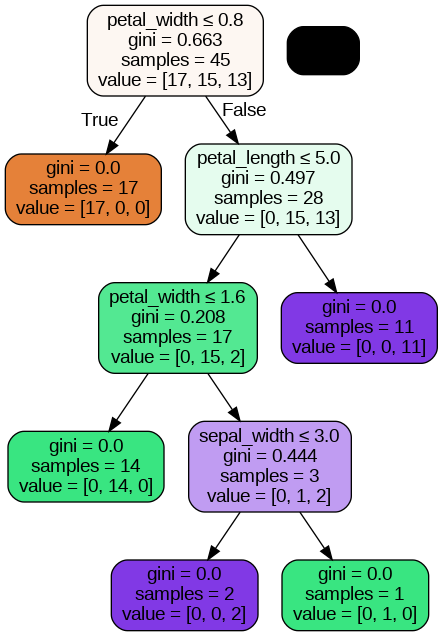

In [21]:

# Import necessary libraries for graph viz
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(clf,out_file=dot_data, feature_names=X.columns,filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Iris.png')
Image(graph.create_png())